In [1]:
#import some packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import math
import re
from datetime import datetime
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import ast
from nltk.stem.snowball import EnglishStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

from wordcloud import WordCloud, STOPWORDS

stop_words = nltk.corpus.stopwords.words("english")

sns.set_theme(style="darkgrid")

In [2]:
df_data  = pd.read_csv("Data/PreProData.csv")
df_geo = pd.read_csv("Data/location_geocode.csv")

Text(0.5, 1.0, 'Sentiment Distribution')

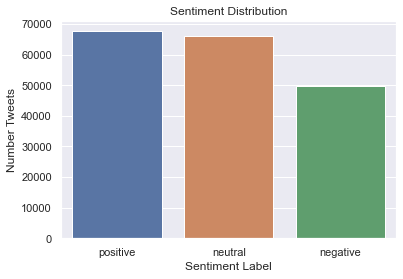

In [3]:
temp = dict(collections.Counter(list(df_data['sentiment_label'])))
p = sns.barplot(x = list(temp.keys()), y = list(temp.values()))
p.set_xlabel("Sentiment Label")
p.set_ylabel("Number Tweets")
p.set_title("Sentiment Distribution")



In [4]:
fig = go.Figure(go.Funnelarea(
    text = list(temp.keys()),
    values = list(temp.values()),
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

<AxesSubplot:xlabel='number_words', ylabel='Density'>

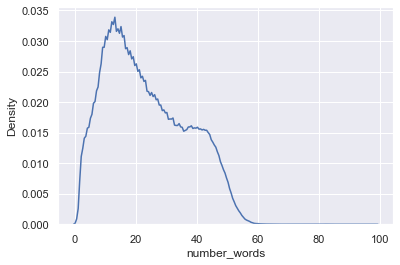

In [5]:
sns.kdeplot(data=df_data['number_words'], bw_adjust= .4)

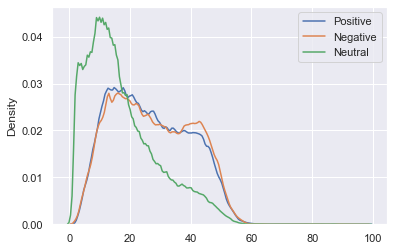

In [6]:
pos_tweets = df_data.loc[df_data['sentiment_label'] == 'positive']['tweet']
neg_tweets = df_data.loc[df_data['sentiment_label'] == 'negative']['tweet']
neu_tweets = df_data.loc[df_data['sentiment_label'] == 'neutral']['tweet']
pos_number_words = [ len([w for w in tw.split()]) for tw in pos_tweets ]
neg_number_words = [ len([w for w in tw.split()]) for tw in neg_tweets ]
neu_number_words = [ len([w for w in tw.split()]) for tw in neu_tweets ]
sns.kdeplot(data=pos_number_words, bw_adjust= .4, label = 'Positive')
sns.kdeplot(data=neg_number_words, bw_adjust= .4, label = 'Negative')
sns.kdeplot(data=neu_number_words, bw_adjust= .4, label = 'Neutral')
plt.legend(['Positive','Negative','Neutral'])
plt.show()



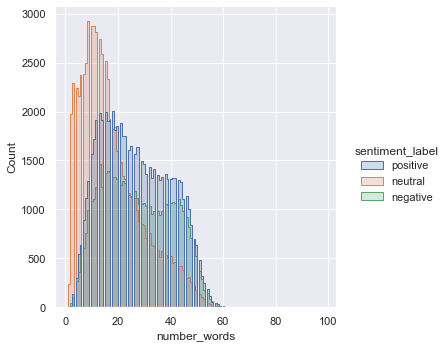

In [7]:
sns.displot(df_data, x = 'number_words', hue = 'sentiment_label', element = 'step')

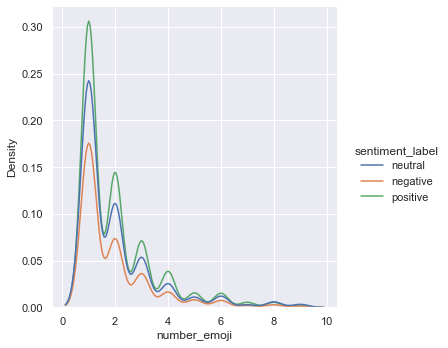

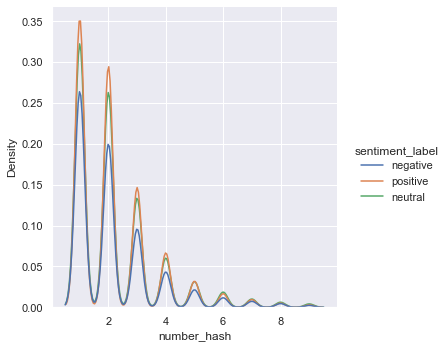

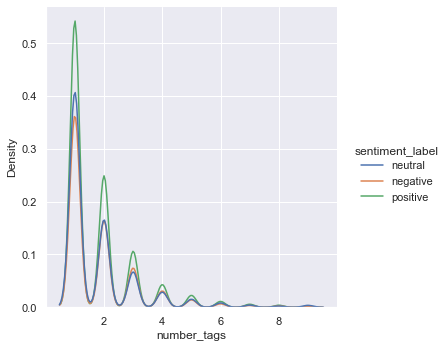

In [8]:
sns.displot(df_data.loc[(df_data['number_emoji'] > 0)].loc[df_data['number_emoji'] < 10], x="number_emoji", hue="sentiment_label",  kind ='kde')
sns.displot(df_data.loc[(df_data['number_hash'] > 0)].loc[df_data['number_hash'] < 10], x="number_hash", hue="sentiment_label",  kind ='kde')
sns.displot(df_data.loc[(df_data['number_tags'] > 0)].loc[df_data['number_tags'] < 10], x="number_tags", hue="sentiment_label",  kind ='kde')

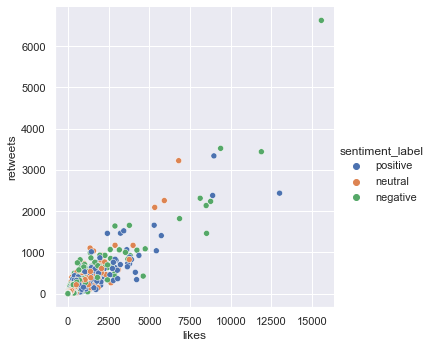

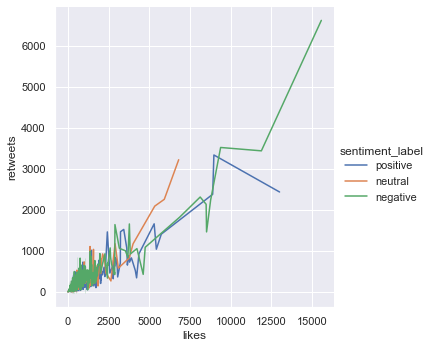

In [9]:
sns.relplot(data = df_data, x="likes", y="retweets", hue="sentiment_label");
sns.relplot(data = df_data, x="likes", y="retweets", hue="sentiment_label",kind = 'line', ci = 'sd');

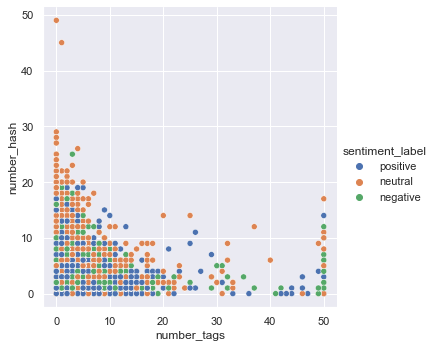

In [10]:
sns.relplot(data = df_data, x="number_tags", y="number_hash", hue="sentiment_label");

We make wordclouds using the raw tweets and also the preprocessed tweets.

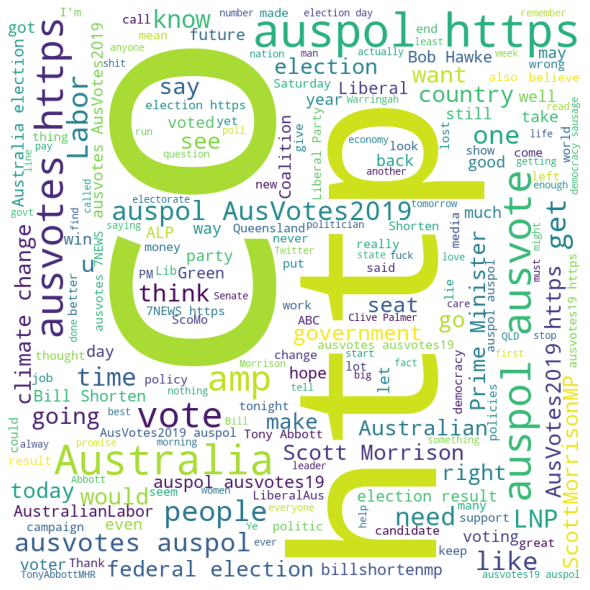

In [11]:
all_words = ""
for s in  list(df_data['tweet']):
    all_words = all_words+s

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

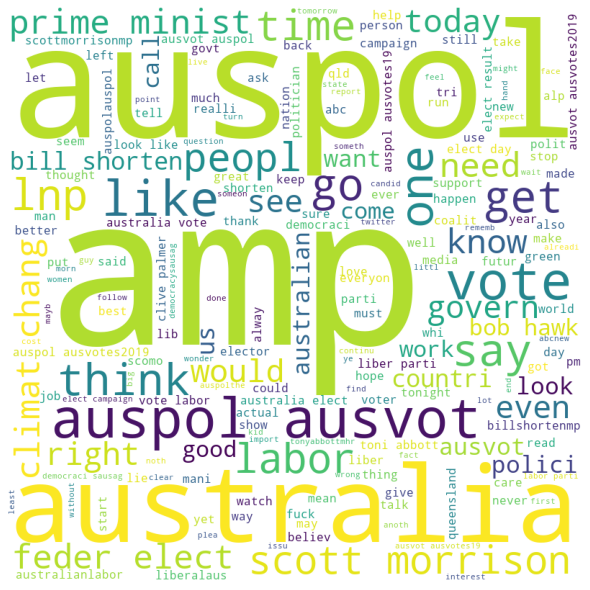

In [12]:
all_words = ""
for s in  list(df_data['tweet_prepro']):
    all_words = all_words+str(s)


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

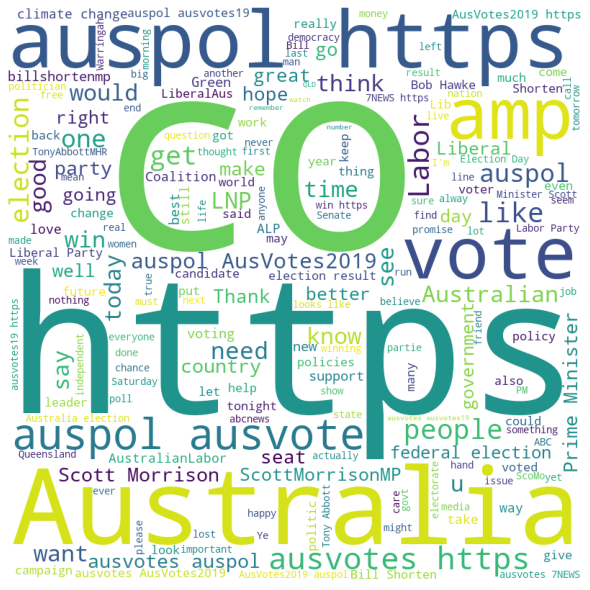

In [13]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'positive'] ['tweet']):
    all_words = all_words+str(s)


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

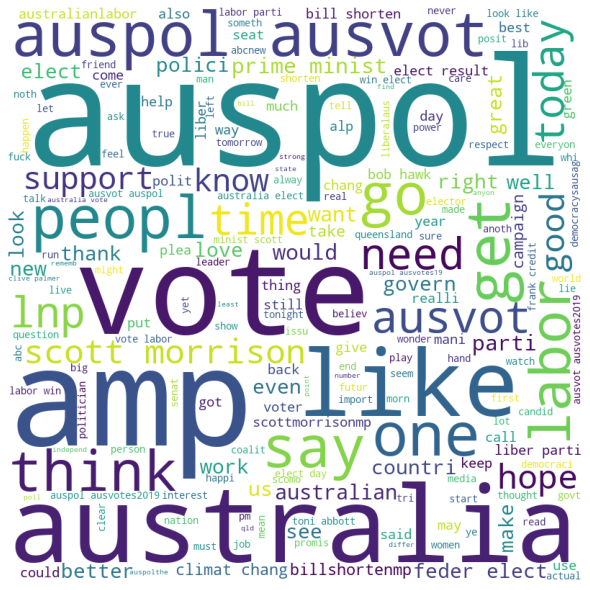

In [14]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'positive'] ['tweet_prepro']):
    all_words = all_words+str(s)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

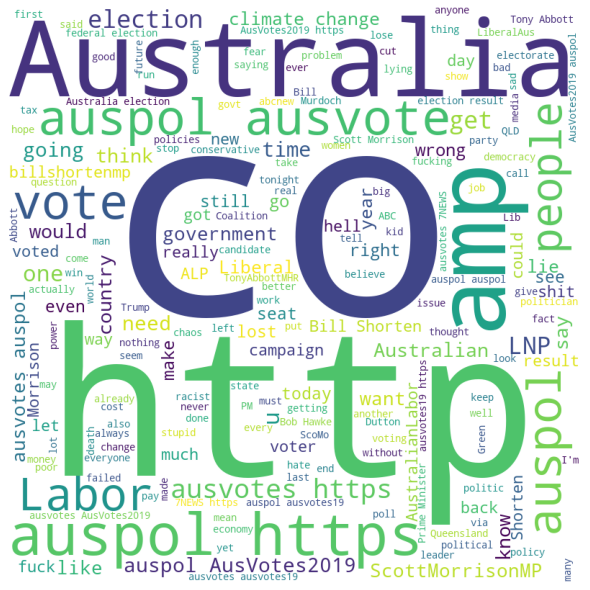

In [15]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'negative'] ['tweet']):
    all_words = all_words+str(s)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

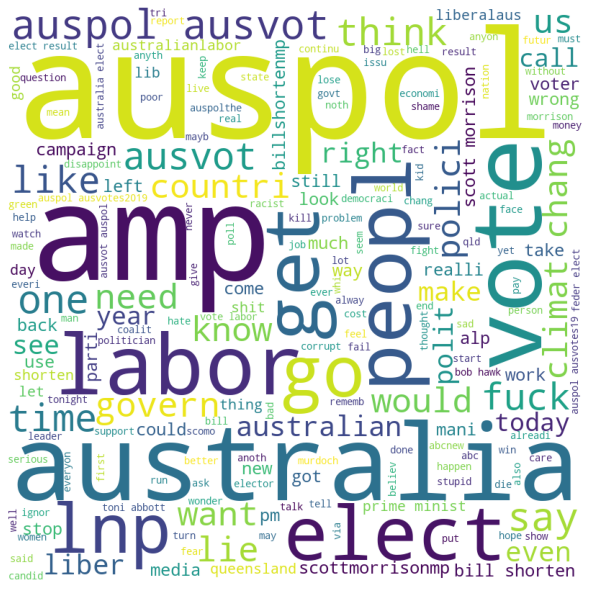

In [16]:
all_words = ""
for s in  list(df_data.loc[ df_data['sentiment_label'] == 'negative'] ['tweet_prepro']):
    all_words = all_words+str(s)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stop_words,
                min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)